# Data Wrangling

## Contents:

* Pandas: spreadsheets/tables in Python
* Reading/writing CSV files (for spreadsheets/tables)

---

# Working with structured data such as tables

We now know how we can read and write textual content to files on our file system. Two more structed and common data formats to store data in are JSON and CSV. If you are not familiar with these, take a look at:

* JSON (https://www.w3schools.com/whatis/whatis_json.asp)
* CSV (https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/)

We will mainly work with CSV here. If you want to know about JSON, you can find that information in the supplementary materials notebook.

# Data wrangling with Pandas

## CSV (in Pandas)

The most often used file type for structured data is CSV (Comma Separated Values), or variants, such as TSV (Tab Separated Values). Python includes another built-in module to deal with these files: the `csv` module. But, we will be using the `Pandas` module, the go-to package for data analysis, that you already imported and updated in Notebook 0. 

A CSV file is similar to an Excel or Google Docs spreadsheet, but more limited in markup and functionality (e.g. you cannot store Excel functions). It is just a text file in which individual entries correspond to lines, and columns are separated by a comma. You can always open a CSV file with a text editor, and this also makes it so easy to store and share data with.

For the rest of the notebook we will see how to work with the two main data types in `pandas`: the `DataFrame` and a `Series`.

Information on functions and modules of Pandas cannot be found in the Python manual online, as it is an external package. Instead, you can refer to https://pandas.pydata.org/pandas-docs/stable/index.html .

### `DataFrame`


What is a `pandas.DataFrame`? 

A `DataFrame` is a collection of `Series` having the same length and whose indexes are in sync. A *collection* means that each column of a dataframe is a series. You can also see it as a spreadheet in memory, that also allows for inclusion of Python objects.

We first have to import the package. It's a convention to do this like so with Pandas, which makes the elements from this package (classes, functions, methods) available under its abbreviation `pd`:

In [2]:
import pandas as pd

Next is loading the data. The following data comes from Wikipedia and was [automatically](https://query.wikidata.org/#%0ASELECT%20DISTINCT%20%3FmovieLabel%20%3Fimdb%20%28MIN%28%3FpublicationYear%29%20as%20%3Fyear%29%20%28year%28%3Fdate%29%20as%20%3Faward_year%29%20%28group_concat%28DISTINCT%20%3FdirectorLabel%3Bseparator%3D%22%2C%20%22%29%20as%20%3Fdirectors%20%29%20%28group_concat%28DISTINCT%20%3FcompanyLabel%3Bseparator%3D%22%2C%20%22%29%20as%20%3Fcompanies%29%20%3Fmale_cast%20%3Ffemale_cast%20WHERE%20%7B%0A%20%20%0A%20%20%7B%0A%20%20%3Fmovie%20p%3AP166%20%3Fawardstatement%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP345%20%3Fimdb%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP577%20%3Fpublication%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP57%20%3Fdirector%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP272%20%3Fcompany%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP31%20wd%3AQ11424%20.%0A%20%20%0A%20%20%3Fawardstatement%20ps%3AP166%20wd%3AQ102427%20%3B%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20pq%3AP585%20%3Fdate%20.%0A%20%20%7D%0A%20%20%0A%20%20BIND%28year%28%3Fpublication%29%20as%20%3FpublicationYear%29%0A%20%20%0A%20%20%7B%0A%20%20%20%20%20SELECT%20%3Fmovie%20%28COUNT%28%3Fcast_member%29%20AS%20%3Fmale_cast%29%20WHERE%20%7B%0A%20%20%20%20%20%20%3Fmovie%20wdt%3AP161%20%3Fcast_member%20.%0A%20%20%20%20%20%20%3Fcast_member%20wdt%3AP21%20wd%3AQ6581097%20.%0A%20%20%20%20%7D%20GROUP%20BY%20%3Fmovie%0A%7D%20%7B%0A%20%20%20%20SELECT%20%3Fmovie%20%28COUNT%28%3Fcast_member%29%20AS%20%3Ffemale_cast%29%20WHERE%20%7B%0A%20%20%20%20%20%20%3Fmovie%20wdt%3AP161%20%3Fcast_member%20.%0A%20%20%20%20%20%20%3Fcast_member%20wdt%3AP21%20wd%3AQ6581072%20.%0A%20%20%20%20%7D%20GROUP%20BY%20%3Fmovie%0A%20%20%7D%0A%20%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22%20.%0A%20%20%20%20%3Fmovie%20rdfs%3Alabel%20%3FmovieLabel%20.%0A%20%20%20%20%3Fdirector%20rdfs%3Alabel%20%3FdirectorLabel%20.%0A%20%20%20%20%3Fcompany%20rdfs%3Alabel%20%3FcompanyLabel%20.%20%0A%20%20%7D%0A%7D%20%0A%0AGROUP%20BY%20%3FmovieLabel%20%3Fimdb%20%3Fdate%20%3Fmale_cast%20%3Ffemale_cast%0AORDER%20BY%20%3Fyear%20) retreived. It is an overview of all movies that have won an Academy Award for Best Picture, including some extra data for the movie: a link to the IMDB, the publication and award year, the director(s), production company and the number of male and female actors in the cast. It can be that this data is incorrect, because this information is not entered in Wikipedia. 

You can find this file in `data/academyawards.csv`. Download it from the repository and save it in the data folder if you don't have it. 

Reading in a csv with pandas is easy. We call the `pd.read_csv()` function with the file path as argument. Pandas takes care of opening and closing the file, so a `with` statement is not needed. The contents of the csv file are then read in a Pandas DataFrame object. We can store this in the variable `df`. 

Calling this variable in a Jupyter Notebook gives back a nicely formatted table with the first and last 5 rows of the file. 

In [3]:
df = pd.read_csv('data/academyawards.csv', encoding='utf-8')
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


Think of a `DataFrame` as an in-memory spreadsheet that you can analyse and manipulate programmatically. Or, think of it as a table in which every line is a data entry, and every column holds specific information on this data.

These columns can also be seen as lists of values. They are ordered and the index of an element corresponds with the index of the data entry. The collection of all such columns is what makes the DataFrame. One column in a table is represented by a Pandas `Series`, which collects observations about a given variable. Multiple columns are a `DataFrame`. A DataFrame therefore is a collection of lists (=columns), or `Series`.

If you look for other methods on `pd` you can call, you'll also see that there is an `pd.read_excel()` option to read spreadsheets in `.xls` or `.xlsx`. You can also  use this, if you have these kind of files.

### Statistics
Now that we loaded our DataFrame, we can make pandas print some statistics on the file. 

In [4]:
df.head()  # First 5 rows

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8


In [6]:
df.tail()  # Last 5 rows

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1
84,Parasite,tt6751668,2019,2020,Bong Joon-ho,"CJ Entertainment, Barunson E&A",5,5


In [5]:
df.describe()  # Descriptive statistics

,year,award_year,male_cast,female_cast
count,85.000000,85.000000,85.000000,85.000000
mean,1974.164706,1975.164706,16.858824,5.835294
std,27.288951,27.350828,12.125488,4.369393
min,1927.000000,1929.000000,4.000000,1.000000
25%,1950.000000,1951.000000,9.000000,3.000000
50%,1975.000000,1976.000000,14.000000,5.000000
75%,1998.000000,1999.000000,21.000000,7.000000
max,2019.000000,2020.000000,89.000000,29.000000


As you can see by what they return, these methods return another DataFrame with some descriptive statistics on the file, such as the number of entries (count), the mean of the numerical values, the standard deviation, minimum and maximum values, and the 25th, 50th, and 75th percentiles.

The `.info()` method can also be informative. It gives you information about a dataframe:
- how much space does it take in memory?
- what is the datatype of each column?
- how many records are there?
- how many `null` values does each column contain (!)?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        85 non-null     object
 1   imdb         85 non-null     object
 2   year         85 non-null     int64 
 3   award_year   85 non-null     int64 
 4   directors    85 non-null     object
 5   companies    85 non-null     object
 6   male_cast    85 non-null     int64 
 7   female_cast  85 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 5.4+ KB


Pandas automatically interprets which datatypes are used in the file, but this is not always correct. Especially if you have empty fields in the DataFrame, any other integers get interpreted as float. Every column has one datatype. You can check them separately by requesting the `.dtypes` argument on the `df`. 

The 'object' type is a string in this file, 'int64' is an integer. 

In [8]:
df.dtypes

movie          object
imdb           object
year            int64
award_year      int64
directors      object
companies      object
male_cast       int64
female_cast     int64
dtype: object

We expect different datatypes for the description-dataframe:

In [9]:
description_df = df.describe()
description_df.dtypes

year           float64
award_year     float64
male_cast      float64
female_cast    float64
dtype: object

### Slicing and selecting

#### `df['column1']`
You can select a single column by calling this column name as if the DataFrame was a dictionary. A single column from a DataFrame returns a `Series` object. 

In [11]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


In [10]:
print(type(df['movie']))

df['movie']

<class 'pandas.core.series.Series'>


0                              Wings
1                The Broadway Melody
2     All Quiet on the Western Front
3                           Cimarron
4                        Grand Hotel
                   ...              
80                         Spotlight
81                         Moonlight
82                The Shape of Water
83                        Green Book
84                          Parasite
Name: movie, Length: 85, dtype: object

The `Series` object is very similar to a `list`:

In [12]:
movies = df['movie']

print("Length:", len(movies))
print()

for n, movie in enumerate(movies[:10], 1):
    print(n, movie, sep='\t')

Length: 85

1	Wings
2	The Broadway Melody
3	All Quiet on the Western Front
4	Cimarron
5	Grand Hotel
6	It Happened One Night
7	Mutiny on the Bounty
8	The Great Ziegfeld
9	The Life of Emile Zola
10	You Can't Take It With You


#### `df[['column1', 'column2']]`
We can also slice a DataFrame by calling multiple column names as one list:

In [13]:
df[['movie', 'imdb']]

,movie,imdb
0,Wings,tt0018578
1,The Broadway Melody,tt0019729
2,All Quiet on the Western Front,tt0020629
3,Cimarron,tt0021746
4,Grand Hotel,tt0022958
...,...,...
80,Spotlight,tt1895587
81,Moonlight,tt4975722
82,The Shape of Water,tt5580390
83,Green Book,tt6966692


### Quiz

* Print a list of all unique companies that have produced an Academy Award-winning movie.


In [ ]:
# Your code here

### Looping over DataFrames

You might expect that if you loop through a DataFrame, you get all the rows. Sadly, it is not that simple, because we now have data in two dimensions. We instead get all the column names (or the first row of the dataframe):

In [14]:
for r in df:
    print(r)

movie
imdb
year
award_year
directors
companies
male_cast
female_cast


Fortunately, there are a few methods we can use to help us with this. We present two here: looping through the dataframe's rows using iterrows(), and looping over a dictionary version of the dataframe.

You can also use the `zip()` function to get tuples from the dataframe which is quite flexible but more advanced, this is shown in the supplementary materials notebook.

#### `.iterrows()`
The easiest and most readable way to loop through a dataframe is using the `.iterrows()` method, which gives you tuples of the index of the row, and the row itself as `Series` object:

In [17]:
df.head(1)

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5


In [19]:
for n, r in df.iterrows():
    
    name = r.movie  # You can use a dot notation here
    year = r.year
    won = r.award_year
    
    print(f"The movie {name} was produced in {year} and won in {won}.")
    
    print()
    
    break  # To not flood the notebook, only print the first

The movie Wings was produced in 1927 and won in 1929.



#### `.to_dict(orient='record')`
Or, looping while accessing all entries in a convenient way, as a Python dictionary for instance, can be done with the `.to_dict(orient='records')` method:

In [18]:
for r in df.to_dict(orient='records'):
    
    print(r)
    print()
    
    name = r['movie']
    year = r['year']
    won = r['award_year']
    
    print("The movie " + name + " was produced in " + str(year) + " and won in " + str(won) + ".")
    
    print()
    
    break  # To not flood the notebook, only print the first

{'movie': 'Wings', 'imdb': 'tt0018578', 'year': 1927, 'award_year': 1929, 'directors': 'William A. Wellman, Harry d’Abbadie d’Arrast', 'companies': 'Paramount Pictures', 'male_cast': 12, 'female_cast': 5}

The movie Wings was produced in 1927 and won in 1929.



---

### Data analysis

In [20]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


You already saw above that you could get statistics by calling `.describe()` on a DataFrame. You can also get these metrics for individual columns. Let's ask the maximum number of male and female actors in the cast of a movie:

In [22]:
df['female_cast'].max()

29

In [23]:
df['male_cast'].max()

89

You can also apply these operations to multiple columns at once. You get a `Series` object back. 

In [24]:
df.max()

movie          You Can't Take It With You
imdb                            tt6966692
year                                 2019
award_year                           2020
directors                   William Wyler
companies       Woodfall Film Productions
male_cast                              89
female_cast                            29
dtype: object

In [25]:
df[['male_cast', 'female_cast']]

,male_cast,female_cast
0,12,5
1,4,3
2,22,6
3,13,6
4,19,8
...,...,...
80,15,2
81,6,2
82,8,3
83,7,1


In [26]:
slice_df = df[['male_cast', 'female_cast']]

slice_df.max()

male_cast      89
female_cast    29
dtype: int64

To find the corresponding movie title, we can ask Pandas to give us the record in which these maxima occur. This is done through `df.loc`. This works by asking: "Give me all the locations (=rows) for which a value in a specified column is equal to this value". 

In [ ]:
df

In [27]:
df[['male_cast', 'female_cast']].max()

male_cast      89
female_cast    29
dtype: int64

In [ ]:
df[df['female_cast'] > 10]

In [29]:
for column_name, value in df[['male_cast', 'female_cast']].max().items():
    
    print("Movie with maximum for", column_name, value)
    
    row = df.loc[df[column_name] == value]
    
    print(row.movie)
    
    print()

Movie with maximum for male_cast 89
59    Forrest Gump
Name: movie, dtype: object

Movie with maximum for female_cast 29
59    Forrest Gump
Name: movie, dtype: object



Other functions that can be used are for instance `.mean()`, `.median()`, `.std()` and `.sum()`.

In [30]:
df['female_cast'].mean()

5.8352941176470585

In [31]:
df['male_cast'].mean()

16.858823529411765

In [32]:
df['female_cast'].sum()

496

In [33]:
df['male_cast'].sum()

1433

In [ ]:
df

Pandas also understands dates, but you have to tell it to interpret a column as such. We can change the `year` column in-place so that it is not interpreted as integer, but as a date object. 

In this case, since we only have the year available, and not a full date such as `2021-02-22` (YYYY-mm-dd), we have to specify the format. Typing `%Y` as string is shorthand for `YYYY`. It returns a full date, so every month and day are set to January first. 

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

df['award_year'] = pd.to_datetime(df['award_year'], format='%Y')

df['year']



In [ ]:
df

### Plotting

Let's try to make some graphs from our data, for instance the number of male/female actors over time. 

We now have a year column that is interpreted as time by Pandas. These values can figure as values on a x-axis in a graph. The y-axis would then give info on the number of male and female actors in the movie. 

First, we set an **index** for the DataFrame. This determines how the data can be accessed. Normally, this is a range of 0 untill the number of rows, just like in a regular Python list. But, in Pandas you can change this, so that we can analyse the dataframe on a time index. 

In [ ]:
# Select only what we need
df_actors = df[['award_year', 'male_cast', 'female_cast']]
df_actors

In [36]:
df_actors = df_actors.set_index('award_year')
df_actors

,male_cast,female_cast
award_year,,
1929-01-01,12,5
1930-01-01,4,3
1930-01-01,22,6
1931-01-01,13,6
1932-01-01,19,8
...,...,...
2016-01-01,15,2
2017-01-01,6,2
2018-01-01,8,3


Then simply call `.plot()` on your newly created DataFrame!

<AxesSubplot:xlabel='award_year'>

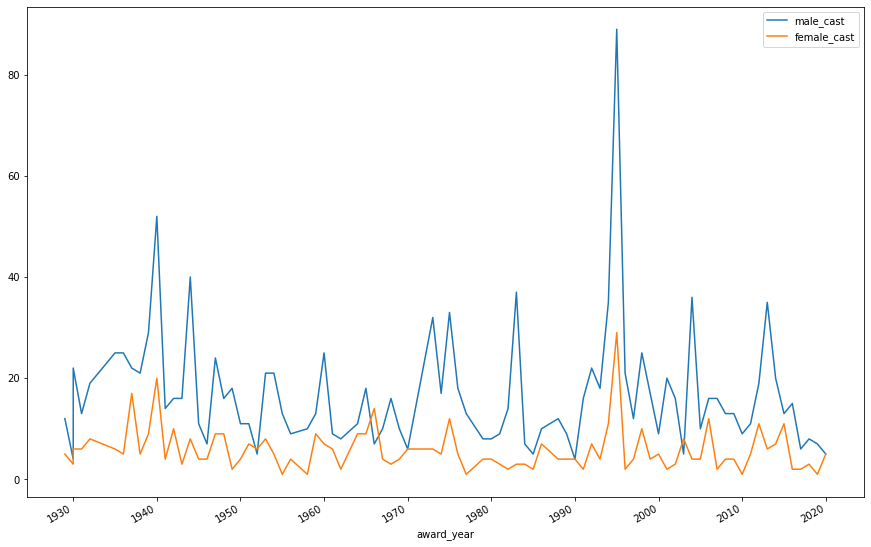

In [37]:
df_actors.plot(figsize=(15,10))

There are tons of parameters, functions, methods, transformations you can use on DataFrames and also on this plotting function. Luckily, plenty of guides and examples can be found on the internet.

### Grouping

In [ ]:
df

Some directors have won multiple Oscars. To find out which, we have to count the number of rows in the DataFrame that include the same director. There is a Pandas function for this: `.count()`. Calling this on the DataFrame itself would give us the total number of rows only, per column. Therefore, we have to tell Pandas that we want to group by a particular column, say 'directors'.

In [38]:
df.groupby('directors')

It does not give back something nicely formatted or interpretable. It's just another Python object. The object returned by `groupby` is a `DataFrameGroupBy` **not** a normal `DataFrame`.

However, some methods of the latter work also on the former, e.g. `.head()` and `.tail()`. Let's call the `.count()` on this object:

In [39]:
df.groupby('directors').count()

,movie,imdb,year,award_year,companies,male_cast,female_cast
directors,,,,,,,
Alejandro González Iñárritu,1,1,1,1,1,1,1
Alfred Hitchcock,1,1,1,1,1,1,1
Anthony Minghella,1,1,1,1,1,1,1
Barry Jenkins,1,1,1,1,1,1,1
Barry Levinson,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
"Vincente Minnelli, Charles Walters",1,1,1,1,1,1,1
Wesley Ruggles,1,1,1,1,1,1,1
"William A. Wellman, Harry d’Abbadie d’Arrast",1,1,1,1,1,1,1


Remember that this counts the numer of rows. As we know that each row is one movie, we can trim this down to:

In [40]:
director_counts = df.groupby('directors').count()['movie']
director_counts

directors
Alejandro González Iñárritu                     1
Alfred Hitchcock                                1
Anthony Minghella                               1
Barry Jenkins                                   1
Barry Levinson                                  1
                                               ..
Vincente Minnelli, Charles Walters              1
Wesley Ruggles                                  1
William A. Wellman, Harry d’Abbadie d’Arrast    1
William Dieterle                                1
William Wyler                                   3
Name: movie, Length: 76, dtype: int64

Now, get all directors that have won an Oscar more than once by specifying a conditional operator:

In [41]:
director_counts[director_counts > 1]

directors
Billy Wilder            2
Clint Eastwood          2
Elia Kazan              2
Francis Ford Coppola    2
Frank Capra             2
Fred Zinnemann          2
Miloš Forman            2
William Wyler           3
Name: movie, dtype: int64

In [ ]:
list(director_counts.items())

In [ ]:
for i, value in director_counts.items():
    print(i, value)

### Adding a column

If we want to get the total number of actors per movie, we have to sum the values from the `male_cast` and `female_cast` columns. 

You can do this in a for loop, by going over every row (like we saw above), but you can also sum the individual columns. Pandas will then add up the values with the same index and will return a new Series of the same length with the values summed. 

In [ ]:
df

In [ ]:
df['male_cast'] + df['female_cast']

In [44]:
total_cast = df['male_cast'] + df['female_cast']
total_cast

0     17
1      7
2     28
3     19
4     27
      ..
80    17
81     8
82    11
83     8
84    10
Length: 85, dtype: int64

Then, we add it as a column in our original dataframe. The only requirement for adding a column to a DataFrame is that the length of the Series or list is the same as that of the DataFrame. 

In [45]:
df['total_cast'] = total_cast
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast,total_cast
0,Wings,tt0018578,1927-01-01,1929-01-01,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5,17
1,The Broadway Melody,tt0019729,1929-01-01,1930-01-01,Harry Beaumont,Metro-Goldwyn-Mayer,4,3,7
2,All Quiet on the Western Front,tt0020629,1930-01-01,1930-01-01,"Lewis Milestone, Nate Watt",Universal Pictures,22,6,28
3,Cimarron,tt0021746,1931-01-01,1931-01-01,Wesley Ruggles,RKO Pictures,13,6,19
4,Grand Hotel,tt0022958,1932-01-01,1932-01-01,Edmund Goulding,Metro-Goldwyn-Mayer,19,8,27
...,...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015-01-01,2016-01-01,Tom McCarthy,"Anonymous Content, Participant",15,2,17
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2,8
82,The Shape of Water,tt5580390,2017-01-01,2018-01-01,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3,11
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1,8


Optionally, we can sort the DataFrame by column. For instance, from high to low (`ascending=False`) for the newly created `total_cast` column.

In [46]:
df_sorted = df.sort_values('total_cast', ascending=False)
df_sorted

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast,total_cast
59,Forrest Gump,tt0109830,1994-01-01,1995-01-01,Robert Zemeckis,Paramount Pictures,89,29,118
10,Gone with the Wind,tt0031381,1939-01-01,1940-01-01,"George Cukor, Victor Fleming, Sam Wood","Metro-Goldwyn-Mayer, Selznick International Pi...",52,20,72
13,Casablanca,tt0034583,1942-01-01,1944-01-01,Michael Curtiz,Warner Bros.,40,8,48
58,Schindler's List,tt0108052,1993-01-01,1994-01-01,"Steven Spielberg, Marek Brodzki",Amblin Entertainment,35,11,46
41,The Godfather Part II,tt0071562,1974-01-01,1975-01-01,Francis Ford Coppola,Paramount Pictures,33,12,45
...,...,...,...,...,...,...,...,...,...
54,Driving Miss Daisy,tt0097239,1989-01-01,1990-01-01,Bruce Beresford,Warner Bros.,4,4,8
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2,8
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1,8
50,Amadeus,tt0086879,1984-01-01,1985-01-01,Miloš Forman,Orion Pictures,5,2,7


### Quiz

* Make a plot of the total number of actors performing in award-winning movies over time.


In [ ]:
# Your code here

### Saving back the file

Use one of the `.to_csv()` or `.to_excel` functions to save the DataFrame. Again, no `with` statement needed, just a file path (and an encoding).

In [ ]:
df_sorted.to_csv('stuff/academyawards_sum.csv', encoding='utf-8')

In [ ]:
df_sorted.to_excel('stuff/academyawards_sum.xlsx')

You need to specify `index=False` if you want to prevent a standard index (0,1,2,3...) to be saved in the file as well. 

In [ ]:
df_sorted.to_csv('stuff/academyawards_sum.csv', encoding='utf-8', index=False)

Open the contents in Excel, LibreOffice Calc, or another program to read spreadsheets!

---

### Exercise 1.

Read the file `data/adams-hhgttg.txt` and:

- Count the number of occurrences per distinct word in the text.

- Create a data frame with two columns: word and counts.

- Plot the histogram of the word frequencies and describe what is happening.

In [ ]:
# Your code here.

---